In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
(train_imgs,train_lables),(test_imgs,test_lables)=tf.keras.datasets.mnist.load_data()

In [2]:
print("Train Image Shape : " , train_imgs.shape)
print("Train Lable Shape : " ,train_lables.shape)
print("Test Image Shape : " ,test_imgs.shape)
print("Test Lable Shape : " ,test_lables.shape)

Train Image Shape :  (60000, 28, 28)
Train Lable Shape :  (60000,)
Test Image Shape :  (10000, 28, 28)
Test Lable Shape :  (10000,)


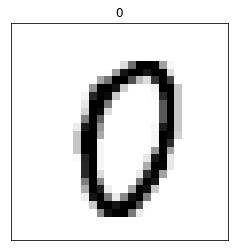

In [3]:
img = 1000
plt.figure()
plt.imshow(train_imgs[img],cmap = plt.cm.gray_r)
plt.title(train_lables[img])
plt.xticks([])
plt.yticks([])
plt.show()

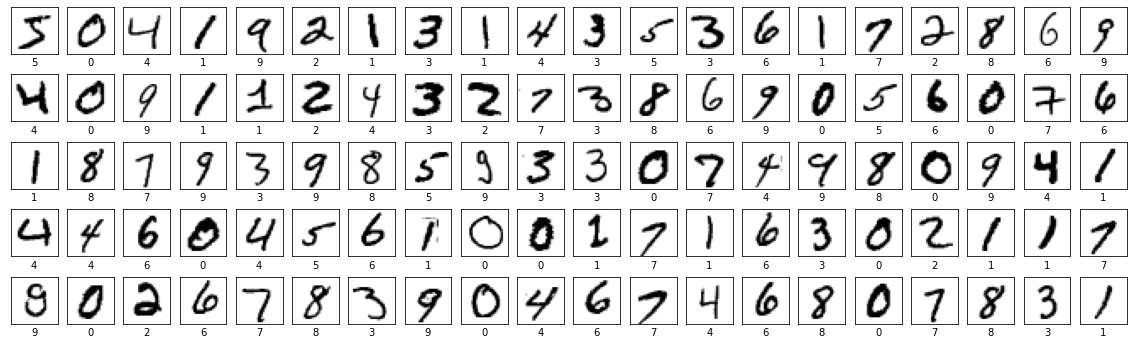

In [4]:
img = 0
row_img = 5
column_img = 20
plt.figure(figsize=(20,6))
for r in range(row_img):
    for c in range(column_img):
        plt.subplot(row_img,column_img,img+1)
        plt.imshow(train_imgs[img],cmap = 'gray_r')
        plt.xlabel(train_lables[img])
        plt.xticks([])
        plt.yticks([])
        img += 1

In [5]:
train_imgs_reshaped = train_imgs.astype('float32')/255
test_imgs_reshaped = test_imgs.astype('float32')/255
print("Train Image Shape : " , train_imgs.shape)
print("Train Image Re-Shaped : " ,train_imgs_reshaped.shape)
print("Test Image Shape : " , test_imgs.shape)
print("Test Image Re-Shaped : " ,test_imgs_reshaped.shape)

Train Image Shape :  (60000, 28, 28)
Train Image Re-Shaped :  (60000, 28, 28)
Test Image Shape :  (10000, 28, 28)
Test Image Re-Shaped :  (10000, 28, 28)


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Conv1D(filters=32, kernel_size=(5), activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=(2)),
    tf.keras.layers.Conv1D(filters=64, kernel_size=(3), activation='relu'),
    tf.keras.layers.MaxPool1D(pool_size=(2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 24, 32)            4512      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 12, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 10, 64)            6208      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 320)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                20544     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4

In [7]:
model.compile(
    optimizer = tf.keras.optimizers.RMSprop(),
    loss = tf.losses.sparse_categorical_crossentropy,
    metrics= ['accuracy']
)
h = model.fit(x=train_imgs_reshaped, y = train_lables , epochs= 10 ,batch_size = 64 ,validation_split=0.3)

Epoch 1/10
657/657 [==============================] - 17s 17ms/step - loss: 0.3451 - accuracy: 0.8941 - val_loss: 0.1517 - val_accuracy: 0.9520
Epoch 2/10
657/657 [==============================] - 9s 14ms/step - loss: 0.1059 - accuracy: 0.9674 - val_loss: 0.0988 - val_accuracy: 0.9697
Epoch 3/10
657/657 [==============================] - 11s 17ms/step - loss: 0.0710 - accuracy: 0.9786 - val_loss: 0.0876 - val_accuracy: 0.9745
Epoch 4/10
657/657 [==============================] - 12s 18ms/step - loss: 0.0554 - accuracy: 0.9824 - val_loss: 0.0811 - val_accuracy: 0.9761
Epoch 5/10
657/657 [==============================] - 10s 15ms/step - loss: 0.0455 - accuracy: 0.9860 - val_loss: 0.0682 - val_accuracy: 0.9812
Epoch 6/10
657/657 [==============================] - 10s 15ms/step - loss: 0.0372 - accuracy: 0.9881 - val_loss: 0.1006 - val_accuracy: 0.9721
Epoch 7/10
657/657 [==============================] - 9s 14ms/step - loss: 0.0295 - accuracy: 0.9906 - val_loss: 0.0762 - val_accuracy: 0

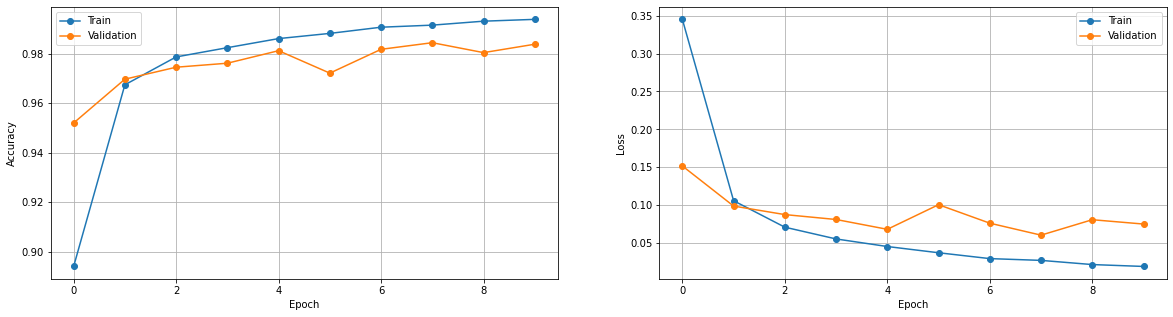

In [8]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '-o')
plt.plot(h.history['val_accuracy'], '-o')
plt.legend(['Train', 'Validation'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.subplot(1,2,2)
plt.plot(h.history['loss'], '-o')
plt.plot(h.history['val_loss'], '-o')
plt.legend(['Train', 'Validation'])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [10]:
test_loss , test_acc =  model.evaluate(test_imgs, test_lables)
print('Test Accuracy:', test_acc)
print('Test Loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 13.8097 - accuracy: 0.9861
Test Accuracy: 0.9861000180244446
Test Loss: 13.809656143188477
